In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import missingno
%matplotlib inline
from utils.helpers import dataset_download_kaggle,geoplot,convert_duration
from collections import Counter
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
import plotly.express as px
from utils.recommender import recommend_movie

In [2]:

dataset_download_kaggle('shivamb','disney-movies-and-tv-shows')

In [3]:
df = pd.read_csv('disney_plus_titles.csv')
df_all = pd.read_csv('disney_plus_titles.csv')

## **EDA AND PREPROCESSING**

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


In [6]:
df.isna().sum()

show_id           0
type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
dtype: int64

<Axes: >

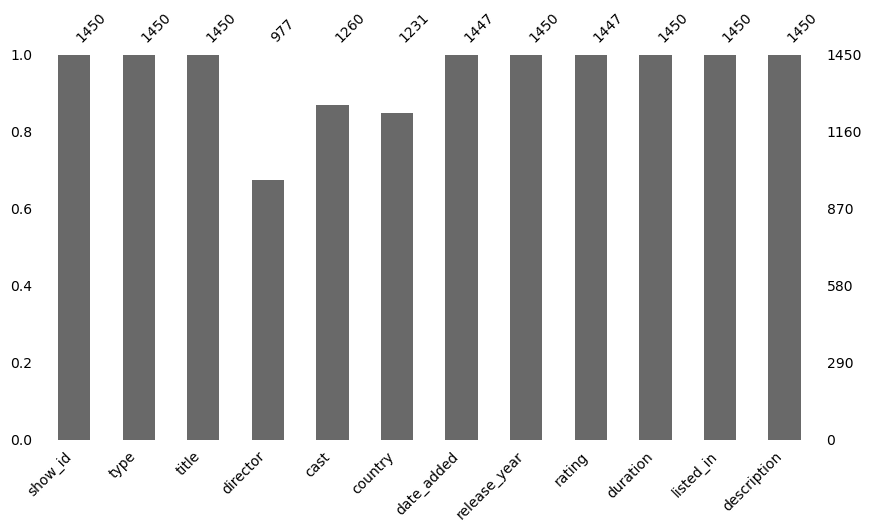

In [7]:
#Missing Values
missingno.bar(df,fontsize=10,figsize=(10,5))

In [8]:
#Handling Missing Values
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])
df['rating'] = df['rating'].fillna(df['country'].mode()[0])
df = df.dropna( how='any',subset=['cast', 'director'])

In [9]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [10]:
#Renaming listen in column and retaining only one value
df = df.rename(columns = {"listed_in":"Genre"})
df['Genre'] = df['Genre'].apply(lambda x: x.split(",")[0])
df['Genre'].head()

0       Animation
1          Comedy
2       Animation
3         Musical
5    Biographical
Name: Genre, dtype: object

In [11]:
df['year_add'] = df['date_added'].apply(lambda x: x.split(" ")[-1])
df['month_add'] = df['date_added'].apply(lambda x: x.split(" ")[0])

In [12]:
#The Volume of Content by Country
country_vals = geoplot(df)
# tabs = Counter(country_vals).most_common(25)

# labels = [_[0] for _ in tabs][::-1]
# values = [_[1] for _ in tabs][::-1]
# trace1 = go.Bar(y=labels, x=values, orientation="h", name="", marker=dict(color="#008B8B"))

# data = [trace1]
# layout = go.Layout(title="The number of content by country", height=600, legend=dict(x=0.1, y=1.1, orientation="h"))
# fig = go.Figure(data, layout=layout)
# fig.show()

In [13]:
tmp1=df.copy()
duration = df['duration'].apply(convert_duration).tolist()
tmp1['new_dur']=duration
genre_duration_means = tmp1.groupby('Genre')['new_dur'].mean()
genre_codes = genre_duration_means.index.tolist()
mean_durations = genre_duration_means.tolist()
data = pd.DataFrame({'Genre': genre_codes, 'Mean Duration': mean_durations})

# Sort the DataFrame by mean duration in descending order
data = data.sort_values(by='Mean Duration', ascending=False)

# Create the bar chart
fig = go.Figure()

# Add a bar trace
fig.add_trace(go.Bar(
    x=data['Genre'],
    y=data['Mean Duration'],
    marker_color='royalblue'  # Customize the bar color as needed
))

# Set the axis labels and chart title
fig.update_layout(
    xaxis_title='Genre',
    yaxis_title='Mean Duration',
    title='Genres vs. Mean Durations'
)

# Show the chart
fig.show()

## **RECOMMENDATION SYSTEM**

In [14]:
movie_name = input("Enter the name of a movie: ")
recommend_movie(df,movie_name)

'Gotta Kick it Up'